<h1 align = "center" > Trabajo Computación Numérica </h1>
<h2 align = "center" > Evaluación 2 </h2>
<br>
<h3 align = "center"> <b>Profesor: </b> Juan Luis López Díaz</h3>
<h3 align = "center"> <b>Integrantes: </b> Fabian Pacheco (20.376.575-4)</h3>
<h3 align = "center"> Benjamin Navarrete (20.169.687-9) </h3>
<h3 align = "center"> Felipe Nazar (20.350.625-2) </h3>
<h3 align = "center"> Sebastian Saldias (20.307.660-6) </h3>

## a) Metodo De Bisección
<style>
    p{
        font-size: 14px;
    }
</style>
* <p>En el ciclo while se está verificando que el error relativo sobrepase el error permitido de detención. (1)</p>
* <p>Se guardan las soluciones del proceso iterativo. (2)</p>

La solución aproximada en la 1-esima iteración es x= 1.5
La solución aproximada en la 2-esima iteración es x= 2.0
La solución aproximada en la 3-esima iteración es x= 2.25
La solución aproximada en la 4-esima iteración es x= 2.375
La solución aproximada en la 5-esima iteración es x= 2.4375
La solución aproximada en la 6-esima iteración es x= 2.46875
La solución aproximada en la 7-esima iteración es x= 2.484375

Tiempo de ejecucion:


 0.06799197196960449


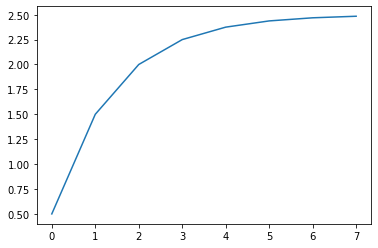

In [21]:
import numpy as np
from math import exp,pi,sqrt
from sympy.solvers import solve
from sympy import*
import numpy as np
import time


Q = 20
B = lambda y:y+3
g = 9.81
Ac = lambda y:3*y + (y**2)/2

inicio = time.time()

def f(x): return 1-((Q**2)/g*(Ac(x)**3))*B(x)
a=0.5 #! primer limite de intervalo
b=2.5 #! segundo limite de intervalo
e=0.01 #! condicion de detencion
r=0 #!indice para guardar la sol. en la iteracion
S=[a] #! vector sol. con solucion inicial "a"
Error=[1] #! lista de errores
relativo = [np.absolute((b-a)/(b))] #!variable errores relativos
Conv = []
while relativo[r]>=e and (r < 10):
    r = r+1
    c=(a+b)/2 #! se define el proceso de biseccion
    print(f"La solución aproximada en la {r}-esima iteración es x=",c)
    if f(c)==0:
        print("La solución obtiene en x = ",c)
    else:
        if f(a)*f(c)>0:
            a=c
        else:
            b=c
    #- Se guardan las sol. del proceso iterativo
    Anterior = r-1
    S.append(c)
    absoluto = np.absolute(S[r]-S[Anterior])
    rela = np.absolute((S[r]-S[Anterior])/S[r])
    relativo.append(rela)
    Error.append(absoluto)
    Razon = (Error[r]/Error[1])
    Conv.append(Razon)

final = time.time()

tiempo_total = final-inicio

print("\nTiempo de ejecucion:\n")
print("\n", tiempo_total)

import matplotlib.pyplot as plt
plt.plot(S)

## b) Metodo de Falsa posición
<style>
    p{
        font-size: 14px;
    }
</style>
### Para realizar el metodo de la falsa posicion nos basamos en el codigo del metodo anterior ajustandolo a este método.
* <p> Agregamos la condicion de detención para cuando no existan más de 10 iteraciones(1)</p>
* <p> Adapatamos nuestras variables por ejemplo: xu = a; xl = b (2)</p>
* <p> La variable tramo guarda el valor absoluto de la diferencia entre el rango b y el a.</p>
* <p>Este metodo tiene como condicionante el valor del producto verificandose el signo de esta y asi haciendo el cambio de xr respectivamente. </p>

xr 2.5045560520807433
xr 3.079147358709482
xr 3.4609953639975566
xr 3.75237541604928
xr 3.9900171702824343
xr 4.191695388458247
xr 4.36746811623032
xr 4.523617708296419
xr 4.664347268958791
xr 4.7926153266267955

Tiempo de ejecucion:


 0.0030066967010498047


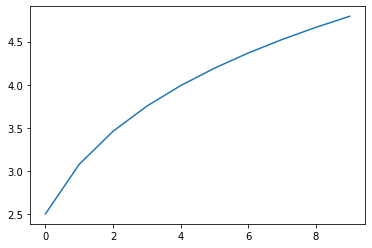

In [22]:
import numpy as np
from math import exp,pi,sqrt
import time

Q = 20
B = lambda y:y+3
g = 9.81
Ac = lambda y:3*y + (y**2)/2

inicio = time.time()
def f(x): return 1-((Q**2)/g*(Ac(x)**3))*B(x)
a=0.5 #! primer limite de intervalo
b=2.5 #! segundo limite de intervalo
e=0.01 #! condicion de detencion
r=0 #!indice para guardar la sol. en la iteracion
S=[] #! vector sol. con solucion inicial "a"


relativo = [np.absolute((b-a)/(b))] #!variable errores relativos
tramo = abs(b - a)
Conv = [] #! no se que es
while tramo>=e and r < 10: #! (1)
    r = r+1 #! (2)
    fu = f(a)
    fl = f(b)
    xr = b - fu*(a - b)/(fl - fu)
    fxr = f(xr)

    if fu*fxr>0:
        tramo = abs(xr - a)
        a=xr
    else:
        tramo = abs(b - xr)
        b=xr
    Anterior = r-1
    S.append(xr)
    print("xr", xr)

final = time.time()

tiempo_total = final - inicio

print("\nTiempo de ejecucion:\n")
print("\n", tiempo_total)

import matplotlib.pyplot as plt
plt.plot(S)

## c) Metodo de Falsa posición Modificada
<style>
    p{
        font-size: 14px;
    }
</style>
<h3> Este método es una implementación del algoritmo de falsa posición modificada </h3>
* <p>Las variables ul e il son definidas para controlar la repeticion del condicional y cuando esto ocurra se dividira entre 2 la varibles     actual en uso (1) </p>
* <p> </p>

xr 2.5045560520807433
xr 3.079147358709482
xr 3.4609953639975566
xr 3.75237541604928
xr 3.9900171702824343
xr 4.191695388458247
xr 4.36746811623032
xr 4.523617708296419
xr 4.664347268958791
xr 4.7926153266267955

Tiempo de ejecucion:


 0.001982450485229492


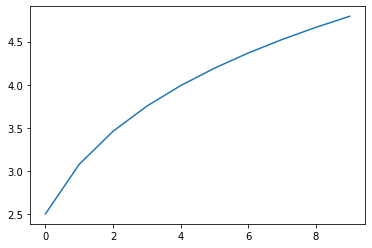

In [23]:
import numpy as np
from math import exp,pi,sqrt
import time

Q = 20
B = lambda y:y+3
g = 9.81
Ac = lambda y:3*y + (y**2)/2

inicio = time.time()
def f(x): return 1-((Q**2)/g*(Ac(x)**3))*B(x)
a=0.5 #! primer limite de intervalo
b=2.5 #! segundo limite de intervalo
e=0.01 #! condicion de detencion
r=0 #!indice para guardar la sol. en la iteracion
S=[] #! vector sol. con solucion inicial "a"
iu,il = 0,0

tramo = abs(b - a)
Conv = [] #! no se que es
while tramo>=e and r < 10: #! (1)
    r = r+1 #! (2)
    fu = f(a)
    fl = f(b)
    xr = b - fu*(a - b)/(fl - fu)
    fxr = f(xr)

    if fu*fxr > 0:
        tramo = abs(xr - a)
        a=xr #! xl = xr
        fu = f(a)
        iu = 0 #! (1)
        il = il+1
        if il >= 2:
            fl = fl / 2
    elif fu*fxr < 0:
        tramo = abs(b - xr)
        b=xr
        fl = f(b)
        il = 0 #! (1)
        iu = iu +1
        if iu >= 2:
            fu = fu / 2
    print("xr", xr)

    
    S.append(xr)

final = time.time()

tiempo_total = final - inicio

print("\nTiempo de ejecucion:\n")
print("\n", tiempo_total)

import matplotlib.pyplot as plt
plt.plot(S)

# Conclusiones

* En cuanto a tiempos de ejecucion el metodo de biseccion demostro ser el menos optimo y el mas optimo en cuanto a rendimiento es el metodo de la falsa posicion modificada.
* Los tres metodos vistos generan una solucion similar para el mismo problema.
* En cuanto a la realizacion del codigo el metodo de la falsa posicion y de la biseccion tienen la misma base algoritmica, en cambio el metodo de la falsa posicion modificada es implementada usando otro algoritmo.